In [48]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [2]:
movies_df = pd.read_csv("data/IMDb movies.csv")
names_df = pd.read_csv("data/IMDb names.csv")
ratings_df = pd.read_csv("data/IMDb ratings.csv")
titles_df = pd.read_csv("data/IMDb title_principals.csv")

/Users/Maxim.Vasilev/.pyenv/versions/miniconda3-latest/envs/da2021/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Task description (in russian)

В ходе выполнения данного задания выбирается набор данных, который будет использоваться в дальнейшем при исследовании алгоритмов кластеризации и классификации. 
Любая задача анализа данных предполагает предобработку и статистический анализ данных, это позволяет в дальнейшем выбрать подходящую модель и алгоритм анализа данных.

#### Задание состоит из последовательного выполнения следующих подзадач.

##### 1. Выбор исследуемого датасета. 

Возможные дата сеты хорошо представлены тут
    1.	 https://github.com/awesomedata/awesome-public-datasets
    2.	Интересные дата сеты http://www.vacommunity.org/About+the+VAST+Challenge
    3.	SWAT 
        1.	https://itrust.sutd.edu.sg/testbeds/secure-water-treatment-swat/#:~:text=SWaT%20consists%20of%20a%20modern,Reverse%20Osmosis%20(RO)%20system.
        2.	https://mlad.kaspersky.com/swat-testbed/  (у меня есть доступ, мне самой 
 
Рекомендация к выбору датасета: предпочтительнее числовые данные, с разметкой.

##### 2. Для каждого датасета представить краткое его описание: 

1.	предметная область, источник данных, характер данных (реальные или имитационные)
2.	какие атрибуты представлены в дата сете, их тип (числовой, строковый (категории)), что они обозначают 
3.	есть ли описание задачи анализа, если есть - представить

##### 3. Для каждого атрибута нужно необходимо определить 

1.	среднее значение, ско
2.	построить гистограмму распределения значений, определить есть ли выбросы 
3.	есть ли пропущенные значение, сколько
4.	предложить вариант обработки пропущенных значений

##### 4. Определить корреляцию между параметрами

1.	какие атрибуты высококоррелированы, определить характер корреляции 
2.	какие атрибуты не имеют корреляцию
3.	постройте графики рассеивания (предпочтительнее матрицу графиков рассеивания)
4.	постройте граф на параллельных координатах
5.	Проаназируйте полученные результаты.

Отчет должен включать описания выполнения каждой подзадачи.


### Movies dataframe analysis

In [3]:
movies_df.head(5)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [4]:
movies_df.describe()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,85855.000000,85855.000000,8.585500e+04,13305.000000,78258.000000,74058.000000
mean,100.351418,5.898656,9.493490e+03,55.896881,46.040826,27.479989
std,22.553848,1.234987,5.357436e+04,17.784874,178.511411,58.339158
min,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000
25%,88.000000,5.200000,2.050000e+02,43.000000,4.000000,3.000000
50%,96.000000,6.100000,4.840000e+02,57.000000,9.000000,8.000000
75%,108.000000,6.800000,1.766500e+03,69.000000,27.000000,23.000000
max,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000


### Conversion rate scrapping

All data was scraped from [xe.com](https://www.xe.com/currencytables/?from=USD&date=2021-02-21) with this function:
```javascript
function get_conversion_rates() {
  let rates_table = document.getElementById("historicalRateTbl").getElementsByTagName("tbody")[0];
    let currency_to_usd = {};

    for (let row of rates_table.getElementsByTagName("tr")) {
        let columns = row.getElementsByTagName("td");
        currency_to_usd[columns[0].textContent] = +columns[3].textContent;
    }

    return currency_to_usd;
}
```

In [5]:
CUR_TO_USD = {
  "USD": 1,
  "EUR": 1.2118402047,
  "GBP": 1.4006845827,
  "INR": 0.0137824399,
  "AUD": 0.7883143098,
  "CAD": 0.7924177681,
  "SGD": 0.7545853523,
  "CHF": 1.1157317343,
  "MYR": 0.2474983458,
  "JPY": 0.0094902639,
  "CNY": 0.1548768626,
  "NZD": 0.7301028225,
  "THB": 0.0333586689,
  "HUF": 0.003381943,
  "AED": 0.2722940776,
  "HKD": 0.1289704651,
  "MXN": 0.0489366225,
  "ZAR": 0.0682113798,
  "PHP": 0.0206182686,
  "SEK": 0.1208031665,
  "IDR": 0.0000711102,
  "SAR": 0.2666666667,
  "BRL": 0.1855273137,
  "TRY": 0.1436680563,
  "KES": 0.0091119342,
  "KRW": 0.0009046443,
  "EGP": 0.063769971,
  "IQD": 0.0006851827,
  "NOK": 0.1181922067,
  "KWD": 3.3048885399,
  "RUB": 0.0134995677,
  "DKK": 0.1629504779,
  "PKR": 0.0062939562,
  "ILS": 0.3055822347,
  "PLN": 0.2702568632,
  "QAR": 0.2747252747,
  "XAU": 1784.2410124212,
  "OMR": 2.6007802341,
  "COP": 0.0002799729,
  "CLP": 0.0014110879,
  "TWD": 0.0357843931,
  "ARS": 0.0112165288,
  "CZK": 0.04680645,
  "VND": 0.0000430699,
  "MAD": 0.1124380143,
  "JOD": 1.4104372355,
  "BHD": 2.6595744681,
  "XOF": 0.0018474385,
  "LKR": 0.005114581,
  "UAH": 0.0357464238,
  "NGN": 0.0026259926,
  "TND": 0.3695449488,
  "UGX": 0.0002727007,
  "RON": 0.2485449275,
  "BDT": 0.0117863604,
  "PEN": 0.2738087773,
  "GEL": 0.3028337685,
  "XAF": 0.0018474385,
  "FJD": 0.4928230145,
  "VEF": 0.1001251564,
  "VES": 5.823e-7,
  "BYN": 0.3867822491,
  "HRK": 0.1600880594,
  "UZS": 0.0000950968,
  "BGN": 0.619604058,
  "DZD": 0.0075112429,
  "IRR": 0.0000237952,
  "DOP": 0.0173002952,
  "ISK": 0.0077877701,
  "XAG": 27.2720943618,
  "CRC": 0.001631017,
  "SYP": 0.0019501703,
  "LYD": 0.2246022918,
  "JMD": 0.0066763116,
  "MUR": 0.0249401451,
  "GHS": 0.1738338629,
  "AOA": 0.0015326846,
  "UYU": 0.0233701793,
  "AFN": 0.0129467678,
  "LBP": 0.0006633499,
  "XPF": 0.0101552209,
  "TTD": 0.1478084781,
  "TZS": 0.0004314972,
  "ALL": 0.0098035547,
  "XCD": 0.370355154,
  "GTQ": 0.1293308226,
  "NPR": 0.0085738351,
  "BOB": 0.1448212002,
  "ZWD": 0.0027631943,
  "BBD": 0.5,
  "CUC": 1,
  "LAK": 0.000106963,
  "BND": 0.7545853523,
  "BWP": 0.092329592,
  "HNL": 0.0414984101,
  "PYG": 0.0001499574,
  "ETB": 0.0251261381,
  "NAD": 0.0682113798,
  "PGK": 0.2828970781,
  "SDG": 0.0181446253,
  "MOP": 0.1252140438,
  "NIO": 0.0285246223,
  "BMD": 1,
  "KZT": 0.0023961865,
  "PAB": 1,
  "BAM": 0.619604058,
  "GYD": 0.0047607716,
  "YER": 0.0040325173,
  "MGA": 0.0002660548,
  "KYD": 1.219506224,
  "MZN": 0.0133619192,
  "RSD": 0.0103060961,
  "SCR": 0.0471717396,
  "AMD": 0.0019068067,
  "SBD": 0.1249000495,
  "AZN": 0.5882559629,
  "SLL": 0.0000981972,
  "TOP": 0.4348980443,
  "BZD": 0.4962052774,
  "MWK": 0.0012820538,
  "GMD": 0.0194498024,
  "BIF": 0.0005131827,
  "SOS": 0.0017241011,
  "HTG": 0.0131618359,
  "GNF": 0.0000998941,
  "MVR": 0.0647128781,
  "MNT": 0.0003502253,
  "CDF": 0.0005049127,
  "STN": 0.0493838942,
  "TJS": 0.0884291808,
  "KPW": 0.0011111112,
  "MMK": 0.00075245,
  "LSL": 0.0682113798,
  "LRD": 0.0057970507,
  "KGS": 0.0118281587,
  "GIP": 1.4006845827,
  "XPT": 1278.9642231501,
  "MDL": 0.0571428849,
  "CUP": 0.0377358491,
  "KHR": 0.0002467951,
  "MKD": 0.0196779112,
  "VUV": 0.0093198316,
  "MRU": 0.0276788757,
  "ANG": 0.5594404029,
  "SZL": 0.0682113798,
  "CVE": 0.0109897543,
  "SRD": 0.0709912752,
  "XPD": 2383.3351486403,
  "SVC": 0.1142857143,
  "BSD": 1,
  "XDR": 1.4429134551,
  "RWF": 0.0010249168,
  "AWG": 0.5586592179,
  "DJF": 0.0056179864,
  "BTN": 0.0137824399,
  "KMF": 0.0024632513,
  "WST": 0.3959962895,
  "SPL": 6.000000024,
  "ERN": 0.0666666667,
  "FKP": 1.4006845827,
  "SHP": 1.4006845827,
  "JEP": 1.4006845827,
  "TMT": 0.2857642001,
  "TVD": 0.7883143098,
  "IMP": 1.4006845827,
  "GGP": 1.4006845827,
  "ZMW": 0.046021039
}

In [6]:
import math

CODE_TO_FIX = {
    "RUR": "RUB",
}

def convert_to_usd(currency: str, value: float) -> float:
    if currency == "$":
        return value
    elif currency in CODE_TO_FIX:
        currency = CODE_TO_FIX[currency]
    elif currency not in CUR_TO_USD:
        return math.nan
    
    return value * CUR_TO_USD[currency]
 

def convert_money_to_usd(v):
    if isinstance(v, str):
        sign, value = v.split()
        return convert_to_usd(sign, float(value))
    
    return v

movies_df["norm_budget"] = movies_df.budget.apply(convert_money_to_usd)
movies_df["norm_usa_gross_income"] = movies_df.usa_gross_income.apply(convert_money_to_usd)
movies_df["norm_worldwide_gross_income"] = movies_df.worlwide_gross_income.apply(convert_money_to_usd)

In [7]:
movies_df.describe()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,norm_budget,norm_usa_gross_income,norm_worldwide_gross_income
count,85855.000000,85855.000000,8.585500e+04,13305.000000,78258.000000,74058.000000,2.309700e+04,1.532600e+04,3.101600e+04
mean,100.351418,5.898656,9.493490e+03,55.896881,46.040826,27.479989,1.161425e+07,1.949154e+07,2.249180e+07
std,22.553848,1.234987,5.357436e+04,17.784874,178.511411,58.339158,5.641334e+07,4.824386e+07,8.873551e+07
min,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000,0.000000e+00,3.000000e+01,1.000000e+00
25%,88.000000,5.200000,2.050000e+02,43.000000,4.000000,3.000000,5.700000e+05,9.331150e+04,1.153132e+05
50%,96.000000,6.100000,4.840000e+02,57.000000,9.000000,8.000000,2.300000e+06,1.309583e+06,1.113086e+06
75%,108.000000,6.800000,1.766500e+03,69.000000,27.000000,23.000000,1.000000e+07,1.712044e+07,8.273941e+06
max,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000,7.672236e+09,9.366622e+08,2.797801e+09


/Users/Maxim.Vasilev/.pyenv/versions/miniconda3-latest/envs/da2021/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/Maxim.Vasilev/.pyenv/versions/miniconda3-latest/envs/da2021/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/Maxim.Vasilev/.pyenv/versions/miniconda3-latest/envs/da2021/lib/python3.8/site-packag

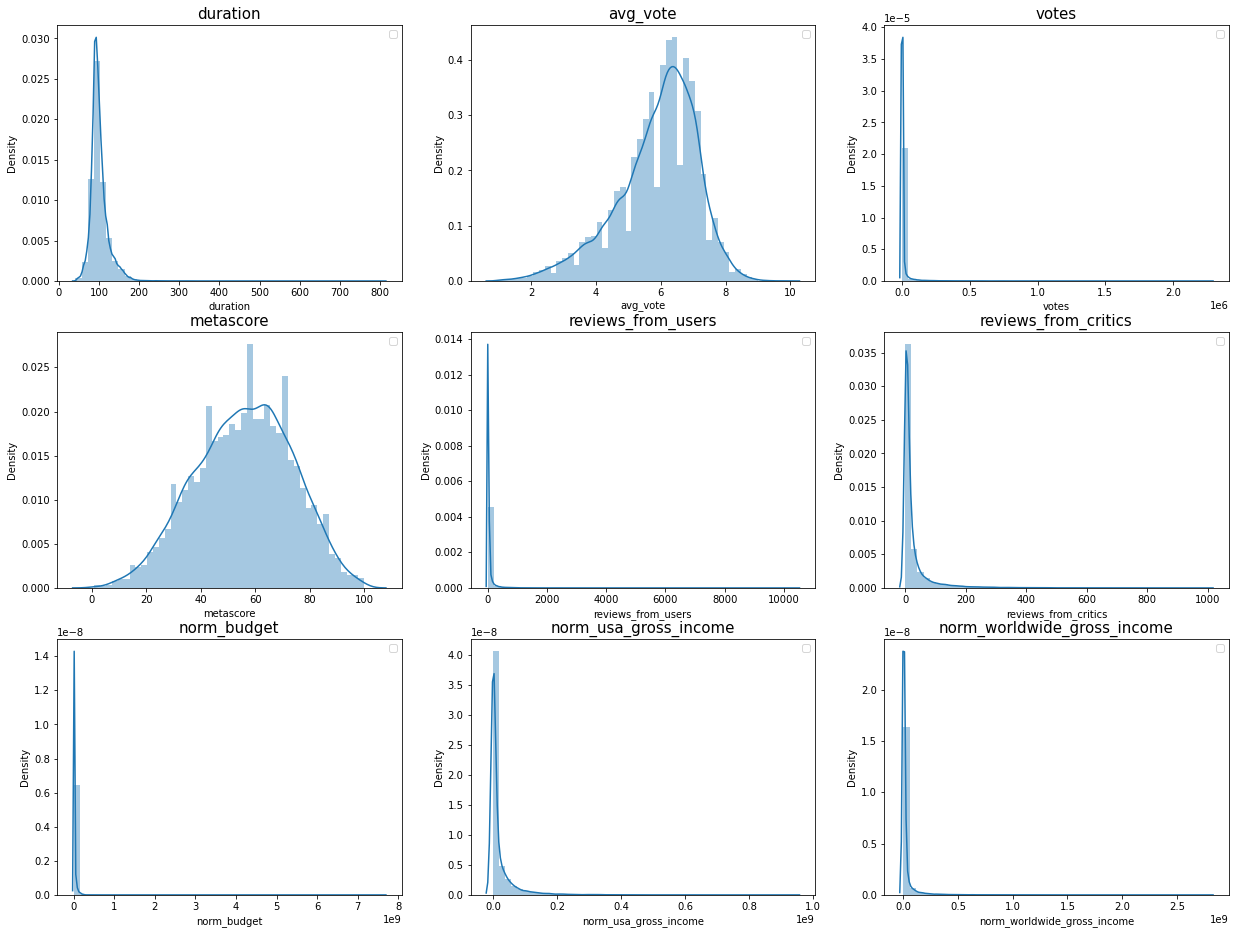

In [112]:
numerical_data = [
    "duration", "avg_vote", "votes", "metascore", "reviews_from_users", "reviews_from_critics", 
    "norm_budget", "norm_usa_gross_income", "norm_worldwide_gross_income"
]

fig, ax = plt.subplots(3, 3, figsize=(21, 16))

for index, column in enumerate(numerical_data):
    row, col = index // 3, index % 3
    current_ax = ax[row, col]
    sns.distplot(ax=current_ax, a = movies_df[column].dropna())
    current_ax.set_title(column, fontsize=15)
    current_ax.legend(loc='best')

plt.show()

## Names dataframe analysiss

In [10]:
names_df.head(5)

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2,0,1,2
1,nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall was born Betty Joan Perske on Se...,"September 16, 1924 in The Bronx, New York City...",1924-09-16,"The Bronx, New York City, New York, USA","August 12, 2014 in New York City, New York, US...",2014-08-12,"New York City, New York, USA",stroke,Jason Robards (4 July 1961 - 10 September 196...,2,1,2,3
2,nm0000003,Brigitte Bardot,Brigitte Bardot,166.0,"Brigitte Bardot was born on September 28, 1934...","September 28, 1934 in Paris, France",1934-09-28,"Paris, France",NaN,NaN,NaN,NaN,Bernard d'Ormale (16 August 1992 - present)\n...,4,3,1,1
3,nm0000004,John Belushi,John Adam Belushi,170.0,"John Belushi was born in Chicago, Illinois, US...","January 24, 1949 in Chicago, Illinois, USA",1949-01-24,"Chicago, Illinois, USA","March 5, 1982 in Hollywood, Los Angeles, Calif...",1982-03-05,"Hollywood, Los Angeles, California, USA",acute cocaine and heroin intoxication,Judith Belushi-Pisano (31 December 1976 - 5 M...,1,0,0,0
4,nm0000005,Ingmar Bergman,Ernst Ingmar Bergman,179.0,"Ernst Ingmar Bergman was born July 14, 1918, t...","July 14, 1918 in Uppsala, Uppsala län, Sweden",1918-07-14,"Uppsala, Uppsala län, Sweden","July 30, 2007 in Fårö, Gotlands län, Sweden (...",2007-07-30,"Fårö, Gotlands län, Sweden",natural causes,Ingrid Bergman (11 November 1971 - 20 May 199...,5,4,5,8


In [11]:
names_df.describe()

,height,spouses,divorces,spouses_with_children,children
count,44681.000000,297705.000000,297705.000000,297705.000000,297705.000000
mean,175.007162,0.208690,0.071722,0.104866,0.196439
std,14.055496,0.570208,0.348499,0.349762,0.721257
min,20.000000,0.000000,0.000000,0.000000,0.000000
25%,168.000000,0.000000,0.000000,0.000000,0.000000
50%,175.000000,0.000000,0.000000,0.000000,0.000000
75%,183.000000,0.000000,0.000000,0.000000,0.000000
max,990.000000,12.000000,12.000000,6.000000,16.000000


### Ratings dataframe analysis

In [12]:
ratings_df.head(5)

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [13]:
ratings_df.describe()

,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
count,85855.000000,8.585500e+04,85855.000000,85855.000000,8.585500e+04,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,...,84911.000000,84911.000000,83057.000000,83057.000000,85176.000000,85176.000000,85646.000000,85646.000000,85854.000000,85854.000000
mean,5.898656,9.493490e+03,6.226342,6.267853,1.216158e+03,1196.774608,2040.896337,2105.668371,1353.192802,700.291177,...,6.071223,685.655451,6.022226,196.065341,5.155706,76.110231,5.925910,1647.822537,5.749638,4332.940865
std,1.234987,5.357436e+04,1.155280,1.481168,1.245582e+04,11735.363316,13801.122865,10699.375191,5976.801303,2931.301270,...,1.454370,3732.376186,1.541895,842.979585,1.290920,124.264020,1.308087,8455.978158,1.285570,23243.807279
min,1.000000,9.900000e+01,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.200000,2.050000e+02,5.600000,6.000000,2.100000e+01,8.000000,18.000000,28.000000,30.000000,22.000000,...,5.300000,10.000000,5.200000,6.000000,4.400000,11.000000,5.200000,24.000000,5.000000,95.000000
50%,6.100000,4.840000e+02,6.400000,6.000000,5.100000e+01,24.000000,49.000000,77.000000,76.000000,53.000000,...,6.300000,27.000000,6.200000,16.000000,5.300000,29.000000,6.100000,81.000000,6.000000,225.000000
75%,6.800000,1.766500e+03,7.000000,7.000000,1.920000e+02,111.500000,234.000000,342.000000,290.000000,178.000000,...,7.000000,109.000000,7.000000,62.000000,6.000000,77.000000,6.800000,335.000000,6.700000,841.000000
max,9.900000,2.278845e+06,9.800000,10.000000,1.259076e+06,629582.000000,418070.000000,241832.000000,145740.000000,78385.000000,...,10.000000,129249.000000,10.000000,34317.000000,10.000000,928.000000,10.000000,348363.000000,10.000000,887226.000000


### Titles dataframe analysis

In [14]:
titles_df.head(5)

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,4,nm0085156,director,NaN,NaN
4,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"


In [15]:
titles_df.describe()

,ordering
count,835513.000000
mean,5.398360
std,2.837061
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,10.000000
